# 1.0 Setup

In [1]:
# Data visualisation and manipulate
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scipy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import math

## For Monte Carlo Simuation
from math import *
from scipy.stats import norm
import random

# Download stock data from Yahoo! Finance stock data
%pip install yfinance
import yfinance as yf

# import pandas_datareader as pdr
from datetime import datetime , timedelta
from dateutil.relativedelta import relativedelta
from copy import copy


# for candlestick plot libraries
%pip install mplfinance
import mplfinance as fplt

# for technical indicators
%pip install ta
from ta import trend, volatility , momentum
import ta

#for plotting portfolio
%pip install plotly
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

#stocks trading simulator
%pip install backtesting
%pip install bokeh==3.2.1

%pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgr

# 2.0 Download stocks data


## 2.1 Timeframe

In [2]:
import datetime

start_date = datetime.datetime(2022, 9, 30)
end_date = start_date + relativedelta(months=12)
total_days = end_date - start_date

print("The starting date is", start_date.strftime("%d/%m/%Y"))
print("The end date is ", end_date.strftime("%d/%m/%Y"))
print("The total days is", total_days.days)

The starting date is 30/09/2022
The end date is  30/09/2023
The total days is 365


## 2.2 Stocks

In [71]:
#Stock data download from Yahoo! Finance

# 1. HSBC
# 2. MTR
# 3. China Mobile
# 4. CLP Holdings
# 5. Hang Seng Bank
# 6. Bank of China


HSBC = {
    'name': 'HSBC',
    'data': yf.download("0005.HK", start_date, end_date)
    }
MTR = {
    'name': 'MTR',
    'data': yf.download("0066.HK", start_date, end_date)
}
CHM = {
    'name': 'China Mobile',
    'data': yf.download("0941.HK", start_date, end_date)
}
CLP = {
    'name': 'CLP Holdings',
    'data': yf.download("0002.HK", start_date, end_date)
}
HSB = {
    'name': 'Hang Seng Bank',
    'data': yf.download("0011.HK", start_date, end_date)
}
BOC = {
    'name': 'Bank of China',
    'data': yf.download("3988.HK", start_date, end_date)
}
CBC = {
    'name': 'China Construction Bank',
    'data': yf.download("0939.HK", start_date, end_date)
}
HSH = {
    'name': 'Haier Smart Home',
    'data': yf.download("6690.HK", start_date, end_date)
}
MET = {
    'name': 'Meituan',
    'data': yf.download("3690.HK", start_date, end_date)
}
XMC = {
    'name': 'Xiaomi Corporation',
    'data': yf.download("1810.HK", start_date, end_date)
}
HSI = {
    'name': 'Hang Seng Index',
    'data': yf.download("^HSI", start_date, end_date)
}

STOCKS = [HSBC, CHM, CLP, CBC, HSH, XMC]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## 2.3 Calculate Technical Indicators (for reference only)



In [72]:
def calculate_technical_indicators(close_price, high, low):
    # Calculate RSI
    rsi = ta.momentum.RSIIndicator(close_price).rsi()

    # Calculate Bollinger Bands
    bollinger_bands = ta.volatility.BollingerBands(close_price)
    upper_band = bollinger_bands.bollinger_hband()
    middle_band = bollinger_bands.bollinger_mavg()
    lower_band = bollinger_bands.bollinger_lband()

    # Calculate MACD
    macd = ta.trend.MACD(close_price).macd()
    macd_signal = ta.trend.MACD(close_price).macd_signal()

    # ADX
    adx = ta.trend.adx(high, low, close_price)

    # Aroon Indicator
    aroon_indicator = ta.trend.AroonIndicator(close_price, low).aroon_indicator()
    
    roc = ta.momentum.ROCIndicator(pd.Series(close_price)).roc()

    # Create a DataFrame to store the calculated indicators

    indicators = pd.DataFrame({
        'RSI': rsi,
        'Upper Bollinger Band': upper_band,
        'Middle Bollinger Band': middle_band,
        'Lower Bollinger Band': lower_band,
        'MACD': macd,
        'MACD Signal': macd_signal,
        'Aroon Indicator': aroon_indicator,
        'ADX': adx,
        'ROC': roc
    })



    return indicators

# Combine all stock data
# all_data = pd.concat([HSBC['Close'], MTR['Close'], CHM['Close'], CLP['Close'], HSB['Close'], BOC['Close']], axis=1)
# all_data.columns = ['HSBC', 'MTR', 'CHM', 'CLP', 'HSB', 'BOC']

for stock in STOCKS:
  stock['TA'] = pd.concat([stock['data'],calculate_technical_indicators(stock['data']['Close'], stock['data']['High'], stock['data']['Low'])])




## 2.4 Set up for Portfolio Optimization

In [65]:
prev_year_start_date = datetime.datetime(2021, 9, 30)
prev_year_end_date = prev_year_start_date + relativedelta(months=12)
port_opt_total_days = prev_year_end_date - prev_year_start_date

print("The starting date is", prev_year_start_date.strftime("%d/%m/%Y"))
print("The end date is ", prev_year_end_date.strftime("%d/%m/%Y"))
print("The total days is", port_opt_total_days.days)

OPTIMIZATION_DATA = {
  'HSBC' : yf.download("0005.HK", prev_year_start_date, prev_year_end_date),
  'China Mobile' : yf.download("0941.HK", prev_year_start_date, prev_year_end_date),
  'CLP Holdings' : yf.download("0002.HK", prev_year_start_date, prev_year_end_date),
  'China Construction Bank': yf.download("0939.HK", prev_year_start_date, prev_year_end_date),
  'Haier Smart Home': yf.download("6690.HK", prev_year_start_date, prev_year_end_date),
  'Xiaomi Corporation': yf.download("1810.HK", prev_year_start_date, prev_year_end_date),
}




The starting date is 30/09/2021
The end date is  30/09/2022
The total days is 365
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### 2.4.1 Portfolio Optimization

https://www.analyticsvidhya.com/blog/2021/04/portfolio-optimization-using-mpt-in-python/


Portfolio Variance is 0.033796733266850794
Portfolio Volatility(Risk) is 0.1838388785508952


Returns                   -0.054141
Volatility                 2.501392
HSBC                       0.122447
China Mobile               0.550795
CLP Holdings               0.010525
China Construction Bank    0.220570
Haier Smart Home           0.077088
Xiaomi Corporation         0.018575
Name: 2918, dtype: float64

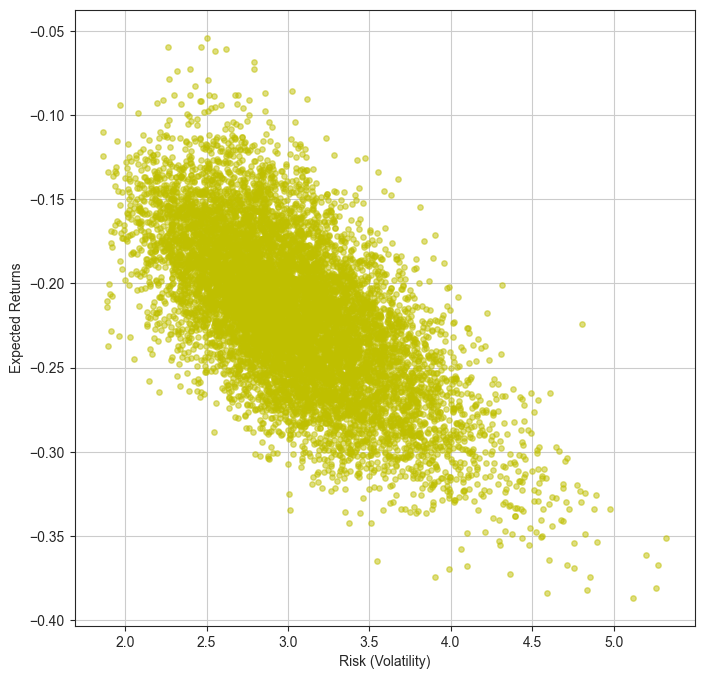

In [91]:
portfolio = {}
for stock in OPTIMIZATION_DATA:
  portfolio[stock] = OPTIMIZATION_DATA[stock]['Close']
portfolio = pd.DataFrame(data=portfolio)
returns_portfolio = portfolio.pct_change()
trading_days = len(returns_portfolio.index)
weight_portfolio = [0.167, 0.167, 0.167, 0.167, 0.167, 0.167]
portfolio_return = returns_portfolio.dot(weight_portfolio)

variance_matrix = returns_portfolio.cov()*trading_days

portfolio_variance = np.transpose(weight_portfolio)@variance_matrix@weight_portfolio
portfolio_volatility = np.sqrt(portfolio_variance)
print("Portfolio Variance is", portfolio_variance)
print("Portfolio Volatility(Risk) is", portfolio_volatility)

port_returns = []
port_volatility = []
port_weights = []

num_assets = len(portfolio.columns)
num_portfolios = 10000

individual_rets = portfolio.resample('Y').last().pct_change().mean()
for port in range(num_portfolios):
  weights = np.random.random(num_assets)
  weights = weights/np.sum(weights)
  port_weights.append(weights)
  returns = np.dot(weights, individual_rets)
  port_returns.append(returns)
  
  var = variance_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
  sd = np.sqrt(var)
  ann_sd = sd*np.sqrt(250)
  port_volatility.append(ann_sd)

data = {'Returns': port_returns, 'Volatility': port_volatility}

for counter, symbol in enumerate(portfolio.columns.tolist()):
  data[symbol] = [w[counter] for w in port_weights]

portfolios_V1 = pd.DataFrame(data) 
portfolios_V1.head()

portfolios_V1.plot.scatter(x='Volatility', y='Returns', marker='o', color='y',
                           s=15, alpha=0.5, grid=True, figsize=[8,8])
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Returns')

rf = 0.01
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns']-rf)/portfolios_V1['Volatility']).idxmax()]
optimal_risky_port

In [67]:
distribution = optimal_risky_port.rename('Weighting')
distribution = distribution.iloc[2:]
distribution

weighting = distribution.to_dict()
weighting

{'HSBC': 0.21503685984832818,
 'China Mobile': 0.6102013565866987,
 'CLP Holdings': 0.0622594724381857,
 'China Construction Bank': 0.06898046532728369,
 'Haier Smart Home': 0.0016806073359677618,
 'Xiaomi Corporation': 0.04184123846353616}

# 3.0 Stock Trading Simulation

In [92]:
import pandas as pd
import warnings
from openpyxl.workbook import Workbook
import os
warnings.filterwarnings("ignore")

if not os.path.isdir("excel"):
  os.mkdir("excel")
if not os.path.isdir("plots"):
  os.mkdir("plots")

# Define technical indicator formulas



def BollingerBands(values):
    bollinger_bands = ta.volatility.BollingerBands(pd.Series(values))
    upper_band = bollinger_bands.bollinger_hband()
    middle_band = bollinger_bands.bollinger_mavg()
    lower_band = bollinger_bands.bollinger_lband()
    return upper_band, middle_band, lower_band

def SMA(values, n):
    return pd.Series(values).rolling(n).mean()

def RSI(values):
    return ta.momentum.RSIIndicator(pd.Series(values)).rsi()

def MACD(values):
    macd = ta.trend.MACD(pd.Series(values))
    return macd.macd(), macd.macd_signal()

def MACD_Value(values):
  return ta.trend.MACD(pd.Series(values)).macd()

def MACD_Signal(values):
  return ta.trend.MACD(pd.Series(values)).macd_signal()

def GET_HSI(values):
  return HSI['data']

def ADX(high, low, close):
  return ta.trend.adx(pd.Series(high), pd.Series(low), pd.Series(close))

def Aroon_Indicator(close, low):
  return ta.trend.AroonIndicator(pd.Series(close), pd.Series(low)).aroon_indicator()

def Stochastic_Oscillator(high, low, close):
  return ta.momentum.stoch_signal(pd.Series(high), pd.Series(low), pd.Series(close))

def EMA(close, n):
   return ta.trend.EMAIndicator(pd.Series(close), n).ema_indicator() 

def ROC(close):
  return ta.momentum.ROCIndicator(pd.Series(close)).roc()

from backtesting import Backtest, Strategy
from backtesting.lib import crossover


# Formula for computing result with given strategy
def RunSimulation(TradingStrategy, plot = {}, plotAll = False, optimisation = False, strategy=''):
  stockNames = []
  returns = []
  trades = []
  equityFinal = []
  equityData = []
  tradeData = []
  statsData=[]
  for stock in STOCKS:
    stockName = stock['name']
    # cashAmt = weighting[stockName] * 100_000_0
    cashAmt = 100_000_0/len(STOCKS)
    bt = Backtest(stock["data"], TradingStrategy, cash=cashAmt, commission=0, trade_on_close=True)
    stats = bt.run()

    directory = 'plots/' + strategy 
    fileName = directory + '/' + stockName 
    
    if not os.path.isdir(directory):
      os.mkdir(directory)

    if plotAll:
      bt.plot(filename=fileName)
    else:
      if stock['name'] in plot:
        bt.plot(filename=fileName)

    stockNames.append(stock['name'])
    returns.append(stats['Return [%]'])
    trades.append(stats["_trades"].size)
    equityFinal.append(stats['Equity Final [$]'])
    equityDF = stats['_equity_curve']
    equityDF["Close"] = stock['data']['Close']
    equityDF = equityDF.drop("DrawdownPct", axis=1)
    equityDF.drop("DrawdownDuration", axis=1)
    new_cols = ["Close", "Equity"]
    equityDF = equityDF.reindex(columns=new_cols)

    equityData.append(equityDF)
    tradeDF = stats['_trades']
    tradeData.append(tradeDF)
    statsData.append(stats[:-3])
  
  if (not optimisation):
    print(pd.DataFrame({
      'Stock': stockNames,
      'Return %': returns,
      'No of Trades': trades,
      'Final Equity': equityFinal
    }))
    print(f'Total Equity: {round(sum(equityFinal), 2)}')
    print(f'Total Return %: {round((sum(equityFinal) - 100_000_0)/100_000_0 * 100, 2)}')

    """ OUTPUT DATA TO EXCEL """

    filename = 'excel/' + strategy + '-results.xlsx'
    with pd.ExcelWriter(filename) as writer:
        for i in range(len(STOCKS)):
          equityData[i].to_excel(writer, sheet_name=STOCKS[i]['name'] + ' Equity', index=True)
          tradeData[i].to_excel(writer, sheet_name=STOCKS[i]['name'] + ' Trades', index=True)
          statsData[i].to_excel(writer, sheet_name=STOCKS[i]['name'] + ' Stats', index=True)
  

  else:
    return sum(returns)
  

def isLarger(first, second):
   return first > second

def optimiseMA(n1_min, n1_max, n2_min, n2_max, MA):
   bestN1 = 0
   bestN2 = 0
   highestReturn = float('-inf')

   for n1 in range(n1_min, n1_max):
      for n2 in range(n2_min, n2_max):
         if n1 >= n2:
            continue
        #  print(f'testing n1={n1}, n2={n2}')
         result = RunSimulation(buildSMAStrategy(n1, n2, MA), optimisation=True)
         if result > highestReturn:
            bestN1 = n1
            bestN2 = n2
            highestReturn = result
   print(f'N1={bestN1}, N2={bestN2}, Total Return={highestReturn}')
            
def buildSMAStrategy(n1, n2, MA):
    class TradingStrategy(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization

      def init(self):
        # Precompute the two moving averages
        self.ma1 = self.I(MA, self.data.Close, n1)
        self.ma2 = self.I(MA, self.data.Close, n2)

      def next(self):
        # If ma1 crosses above ma2, close any existing
        # short trades, and buy the asset
        if isLarger(self.ma1, self.ma2):
          if self.data.index[-1].weekday() == 4:
              self.buy()

        elif isLarger(self.ma2, self.ma1):
          if self.data.index[-1].weekday() == 4:
            if self.position.is_long:
              self.position.close() 
    return TradingStrategy

   

In [334]:
optimiseMA(1, 20, 15, 50, SMA)

N1=3, N2=19, Total Return=134.68808051633835


## 3.1 SMA Crossover

In [93]:
class TradingStrategy(Strategy):
  # Define the two MA lags as *class variables*
  # for later optimization
  n1 = 5
  n2 = 15

  def init(self):
    # Precompute the two moving averages
    self.sma1 = self.I(SMA, self.data.Close, self.n1)
    self.sma2 = self.I(SMA, self.data.Close, self.n2)

  def next(self):
    # If sma1 crosses above sma2, close any existing
    # short trades, and buy the asset
    if isLarger(self.sma1, self.sma2):
      if self.data.index[-1].weekday() == 4:
          self.buy()

    elif isLarger(self.sma2, self.sma1):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

RunSimulation(TradingStrategy, strategy='SMA', plotAll=True)


                     Stock   Return %  No of Trades   Final Equity
0                     HSBC  43.904257            40  239840.428713
1             China Mobile  22.964920            70  204941.533740
2             CLP Holdings   2.924967            70  171541.611235
3  China Construction Bank   8.001625            60  180002.708664
4         Haier Smart Home  17.747188            70  196245.313292
5       Xiaomi Corporation   5.945611            80  176576.018410
Total Equity: 1169147.61
Total Return %: 16.91


## 3.1.2 EMA Crossover

In [361]:
class TradingStrategy(Strategy):
  # Define the two MA lags as *class variables*
  # for later optimization
  n1 = 3
  n2 = 15

  def init(self):
    # Precompute the two moving averages
    self.ema1 = self.I(EMA, self.data.Close, self.n1)
    self.ema2 = self.I(EMA, self.data.Close, self.n2)

  def next(self):
    # If ema1 crosses above ema2, close any existing
    # short trades, and buy the asset
    if isLarger(self.ema1, self.ema2):
      if self.data.index[-1].weekday() == 4:
          self.buy()

    elif isLarger(self.ema2, self.ema1):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

RunSimulation(TradingStrategy, strategy='EMA')

                     Stock   Return %  No of Trades   Final Equity
0                     HSBC  54.941676            40  258236.126570
1             China Mobile  33.825175            30  223041.958884
2             CLP Holdings  -5.795223            60  157007.962138
3  China Construction Bank  11.379083            40  185631.805517
4         Haier Smart Home   5.339630            60  175566.049531
5       Xiaomi Corporation   8.587653            70  180979.422287
Total Equity: 1180463.32
Total Return %: 18.05


## 3.2 MACD

In [362]:
class TradingStrategy(Strategy):

  def init(self):
    self.macd, self.signal = self.I(MACD, self.data.Close)
    self.RSI = self.I(RSI, self.data.Close)

  def next(self):
    if isLarger(self.signal, self.macd):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    elif isLarger(self.macd, self.signal):
      if self.data.index[-1].weekday() == 4:
        self.buy()


RunSimulation(TradingStrategy, strategy='MACD')

                     Stock   Return %  No of Trades   Final Equity
0                     HSBC  25.600988            60  209334.979541
1             China Mobile  10.203080            60  183671.800551
2             CLP Holdings  -3.683012            60  160528.313868
3  China Construction Bank  -6.875812            70  155206.979627
4         Haier Smart Home  -4.254395            70  159576.008725
5       Xiaomi Corporation -12.775434            80  145374.277119
Total Equity: 1013692.36
Total Return %: 1.37


## 3.3 RSI

In [75]:
class TradingStrategy(Strategy):
  overbought = 70
  oversold = 30
  def init(self):
    self.RSI = self.I(RSI, self.data.Close)

  def next(self):
    if crossover(self.RSI, 70):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    elif crossover(30, self.RSI):
      if self.data.index[-1].weekday() == 4:
        self.buy()


RunSimulation(TradingStrategy, strategy='RSI')


                     Stock   Return %  No of Trades   Final Equity
0                     HSBC   3.324402            10  222185.548661
1             China Mobile  16.094359            10  708409.356587
2             CLP Holdings   0.000000             0   62259.472438
3  China Construction Bank   0.000000             0   68980.465327
4         Haier Smart Home  14.881521            10    1930.707273
5       Xiaomi Corporation   0.000000             0   41841.238464
Total Equity: 1105606.79
Total Return %: 10.56


## 3.4 Bollinger Bands

In [76]:
class TradingStrategy(Strategy):
  def init(self):
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)

  def next(self):
    if crossover(self.data.Close, self.upper_band):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    elif crossover(self.lower_band, self.data.Close):
      if self.data.index[-1].weekday() == 4:
        self.buy()


RunSimulation(TradingStrategy, strategy='BB')

                     Stock   Return %  No of Trades   Final Equity
0                     HSBC  11.345400            10  239433.651123
1             China Mobile   0.303010            10  612050.328373
2             CLP Holdings   7.410196            20   66873.021568
3  China Construction Bank   0.000000             0   68980.465327
4         Haier Smart Home   0.000000             0    1680.607336
5       Xiaomi Corporation   3.168841            10   43167.120711
Total Equity: 1032185.19
Total Return %: 3.22


## 3.5 ADX and Bollinger bands

In [366]:
class TradingStrategy(Strategy):
  def init(self):
    # self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)

  def next(self):
    # Sell condition
    if crossover(20, self.ADX):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    # Buy condition
    elif crossover(self.ADX, 25):
      if self.data.index[-1].weekday() == 4:
        self.buy()


RunSimulation(TradingStrategy, strategy='ADX_BB')

                     Stock  Return %  No of Trades   Final Equity
0                     HSBC  0.000000             0  166666.666667
1             China Mobile  0.000000             0  166666.666667
2             CLP Holdings  0.000000             0  166666.666667
3  China Construction Bank -0.200395            10  166332.674948
4         Haier Smart Home  0.000000             0  166666.666667
5       Xiaomi Corporation  0.000000             0  166666.666667
Total Equity: 999666.01
Total Return %: -0.03


## 3.7 Aroon and BB

In [367]:
class TradingStrategy(Strategy):
  def init(self):
    self.macd, self.signal = self.I(MACD, self.data.Close)
    self.RSI = self.I(RSI, self.data.Close)
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)
    self.AI = self.I(Aroon_Indicator, self.data.Close, self.data.Low)

  def next(self):
    # Sell condition
    if self.AI < 0 and crossover(self.data.Close, self.upper_band):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    # Buy condition
    elif self.AI > 0 and crossover(self.lower_band, self.data.Close):
      if self.data.index[-1].weekday() == 4:
        self.buy()

RunSimulation(TradingStrategy, strategy='AI_BB')


                     Stock  Return %  No of Trades   Final Equity
0                     HSBC  7.889845            10  179816.407649
1             China Mobile -0.833255            10  165277.908961
2             CLP Holdings  0.000000             0  166666.666667
3  China Construction Bank  0.000000             0  166666.666667
4         Haier Smart Home  0.000000             0  166666.666667
5       Xiaomi Corporation  1.559739            10  169266.231074
Total Equity: 1014360.55
Total Return %: 1.44


## 3.8 Aroon and ADX

In [368]:
class TradingStrategy(Strategy):
  def init(self):
    self.macd, self.signal = self.I(MACD, self.data.Close)
    self.RSI = self.I(RSI, self.data.Close)
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)
    self.AI = self.I(Aroon_Indicator, self.data.Close, self.data.Low)

  def next(self):
    # Sell condition
    if crossover(0, self.AI) and isLarger(20, self.ADX):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    # Buy condition
    elif crossover(self.AI, 0) and isLarger(self.ADX, 25):
      if self.data.index[-1].weekday() == 4:
        self.buy()

RunSimulation(TradingStrategy, strategy='AI_ADX')


                     Stock  Return %  No of Trades   Final Equity
0                     HSBC  0.000000             0  166666.666667
1             China Mobile -2.240100            10  162933.166667
2             CLP Holdings  0.000000             0  166666.666667
3  China Construction Bank  2.107732            10  170179.552622
4         Haier Smart Home  0.000000             0  166666.666667
5       Xiaomi Corporation  0.000000             0  166666.666667
Total Equity: 999779.39
Total Return %: -0.02


## 3.9 ADX and BB

In [369]:
class TradingStrategy(Strategy):
  def init(self):
    self.macd, self.signal = self.I(MACD, self.data.Close)
    self.RSI = self.I(RSI, self.data.Close)
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)
    self.AI = self.I(Aroon_Indicator, self.data.Close, self.data.Low)

  def next(self):
    # Sell condition
    if isLa(self.data.Close, self.upper_band) and isLarger(20, self.ADX):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()

    # Buy condition
    elif crossover(self.lower_band, self.data.Close) and isLarger(self.ADX, 25):
      if self.data.index[-1].weekday() == 4:
        self.buy()

RunSimulation(TradingStrategy, strategy='ADX_BB')


                     Stock  Return %  No of Trades   Final Equity
0                     HSBC  0.000000             0  166666.666667
1             China Mobile  0.302995            10  167171.658961
2             CLP Holdings  0.000000             0  166666.666667
3  China Construction Bank  0.000000             0  166666.666667
4         Haier Smart Home  0.000000             0  166666.666667
5       Xiaomi Corporation  0.000000             0  166666.666667
Total Equity: 1000504.99
Total Return %: 0.05


# 4.0 STRATEGIES

In [373]:
class TradingStrategy(Strategy):
  # Define the two MA lags as *class variables*
  # for later optimization
  n1 = 1
  n2 = 20

  def init(self):
    # Precompute the two moving averages
    # self.macd, self.signal = self.I(MACD, self.data.Close)
    self.ema1 = self.I(EMA, self.data.Close, self.n1)
    self.ema2 = self.I(EMA, self.data.Close, self.n2)
    # self.sma1 = self.I(SMA, self.data.Close, self.n1)
    # self.sma2 = self.I(SMA, self.data.Close, self.n2)
    self.RSI = self.I(RSI, self.data.Close)
    # self.ROC = self.I(ROC, self.data.Close)
    self.ADX = self.I(ADX, self.data.High, self.data.Low, self.data.Close)
    self.AI = self.I(Aroon_Indicator, self.data.Close, self.data.Low)
    self.upper_band, self.middle_band, self.lower_band = self.I(BollingerBands, self.data.Close)


  def next(self):
    if isLarger(self.ema1, self.ema2) and isLarger(self.AI, 0):
      if self.data.index[-1].weekday() == 4:
          self.buy()

    elif isLarger(self.ema2, self.ema1) and isLarger(0, self.AI):
      if self.data.index[-1].weekday() == 4:
        if self.position.is_long:
          self.position.close()


RunSimulation(TradingStrategy)

                     Stock   Return %  No of Trades   Final Equity
0                     HSBC  30.577495            30  217629.158003
1             China Mobile  29.044026            20  215073.376475
2             CLP Holdings -12.578286            40  145702.856082
3  China Construction Bank   7.638358            30  179397.263013
4         Haier Smart Home   3.545164            40  172575.273297
5       Xiaomi Corporation  12.596846            20  187661.409630
Total Equity: 1118039.34
Total Return %: 11.8
